<a href="https://colab.research.google.com/github/JayPBhatia/SUTDML2021Project/blob/main/SUTDML2021Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [40]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [41]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.keras.__version__)
print(tf.__version__)

2.7.0
2.7.0


## DataSet

In [42]:
train_X_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/train/X_train.txt'
train_Y_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/train/y_train.txt'

test_X_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/test/X_test.txt'
test_Y_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/test/y_test.txt'


train_X = pd.read_csv(train_X_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')
train_Y = pd.read_csv(train_Y_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')

test_X = pd.read_csv(test_X_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')
test_Y = pd.read_csv(test_Y_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')

test_Y = test_Y.rename(columns={0: "activity"})
train_Y = train_Y.rename(columns={0: "activity"})


## Exploratory Data Analysis (EDA)

In [ ]:
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,0.061436,0.074840,0.198204,-0.264307,0.072545,-0.155320,0.323154,-0.170813,0.294938,-0.306081,0.482148,-0.470129,-0.305693,-0.362654,0.507459,...,-0.999895,-0.988055,-1.000000,1.000000,0.678921,-0.701131,-0.909639,-0.989413,-0.987836,-0.986850,-0.986749,-0.996199,-0.989413,-0.999876,-0.989136,-0.720891,-1.000000,-0.035684,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,0.191161,0.086904,0.257615,-0.272505,0.434728,-0.315375,0.439744,-0.269069,0.179414,-0.088952,-0.155804,-0.189763,0.599213,...,-0.999941,-0.994169,-1.000000,-1.000000,0.559058,-0.528901,-0.858933,-0.991433,-0.989059,-0.987744,-0.991462,-0.998353,-0.991433,-0.999902,-0.989321,-0.763372,-0.897436,-0.273

In [ ]:
train_X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
1,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
2,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
3,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
4,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
556,7352.0,0.008726,0.608303,-1.000000,-0.482273,0.008735,0.506187,0.998702
557,7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
558,7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
559,7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157


In [ ]:
train_X.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [ ]:
train_X.duplicated().sum()

0

In [ ]:
test_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.993471,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.997610,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.999269,-0.978222,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.974418,-0.999953,-0.999330,-0.998933,-0.995236,-0.978739,-0.969982,-0.749578,-0.899226,-0.553813,0.174684,-0.051332,0.034200,0.153639,0.030767,-0.129277,0.446100,-0.419496,0.271493,-0.225769,0.416376,-0.286445,-0.063792,-0.167111,0.544916,...,-0.999400,-0.980365,-1.000000,-0.968254,0.148649,-0.619905,-0.887178,-0.976297,-0.971248,-0.966029,-0.974878,-0.996129,-0.976297,-0.999458,-0.975174,-0.566733,-0.948718,-0.285636,-0.446478,-0.756855,-0.985562,-0.985843,-0.984217,-0.988566,-0.992021,-0.985562,-0.999850,-0.984015,-0.849081,-0.936508,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,-0.560831,-0.825894,0.849179,0.670700,0.829897,-0.975283,-0.999954,-0.999467,-0.998823,-0.993498,-0.967032,-0.976257,-0.590576,-0.740206,-0.799419,0.115570,-0.028923,-0.032804,0.294340,0.000630,-0.045272,0.168419,-0.068156,0.074384,0.027138,-0.145931,-0.050197,0.235151,0.290487,0.457718,...,-0.999812,-0.989996,-1.000000,-0.809524,0.422249,-0.543096,-0.831313,-0.977007,-0.969619,-0.968915,-0.973746,-0.996970,-0.977007,-0.999429,-0.976111,-0.555564,-1.000000,-0.34906

In [ ]:
test_X.duplicated().sum()

0

In [ ]:
test_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2947 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


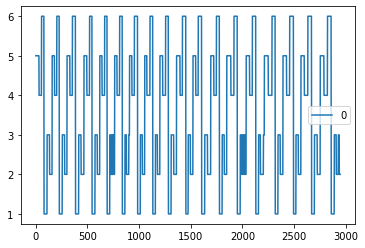

In [ ]:
test_Y.plot()

In [26]:
subject_test_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/test/subject_test.txt'
subject_test = pd.read_csv(subject_test_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')
subject_test = subject_test.rename(columns={0: "subject"})
subject_test_Y = pd.concat([subject_test,test_Y],axis=1)

subject
2     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
24    AxesSubplot(0.125,0.125;0.775x0.755)
Name: activity, dtype: object

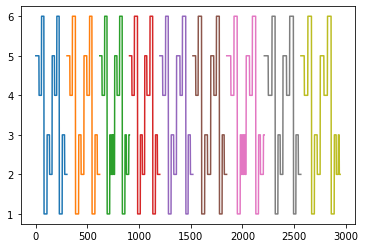

In [27]:
subject_test_Y.groupby('subject').activity.plot()

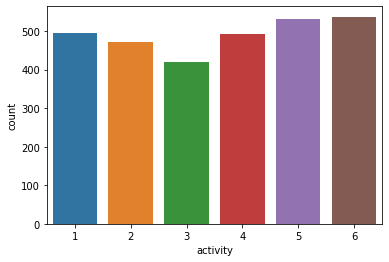

In [28]:
sns.countplot(x = 'activity', data = subject_test_Y)
plt.show()

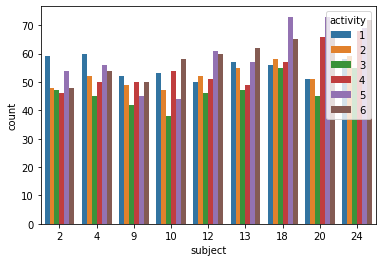

In [29]:
sns.countplot(x = 'subject', hue='activity', data = subject_test_Y)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b79ae4d0>,
      dtype=object)

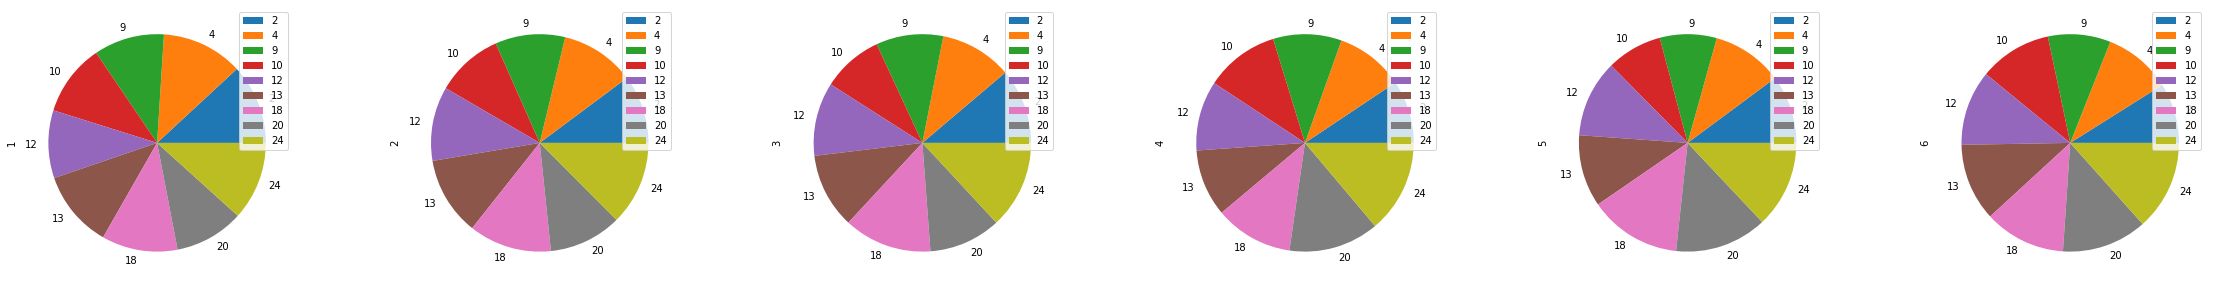

In [ ]:
subject_test_Y.groupby(['subject','activity']).size().unstack().plot(kind='pie',subplots=True, figsize=(40, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b5ef8810>,
      dtype=object)

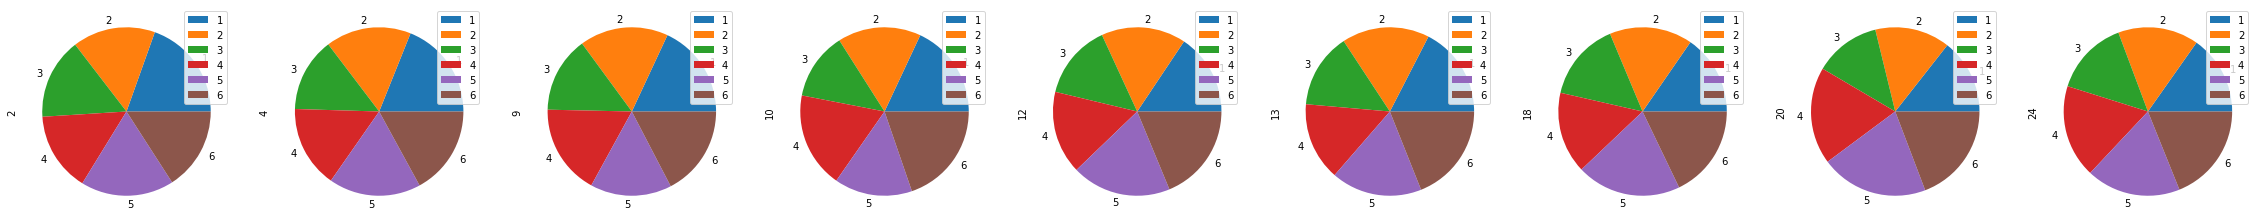

In [ ]:
subject_test_Y.groupby(['activity','subject']).size().unstack().plot(kind='pie',subplots=True, figsize=(40, 5))

In [38]:
n = len(test_Y)
val_Y = test_Y[:int(n*0.7)]
test_Y = test_Y[int(n*0.7):]
val_X = test_X[:int(n*0.7)]
test_X = test_X[int(n*0.7):]


In [ ]:
val_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 8.8 MB


In [ ]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 2062 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 3.8 MB


In [43]:
from sklearn.decomposition import PCA
principalComponents = PCA(n_components=2).fit_transform(train_X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, train_Y], axis = 1)

explained_variance_ratio_ [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069]


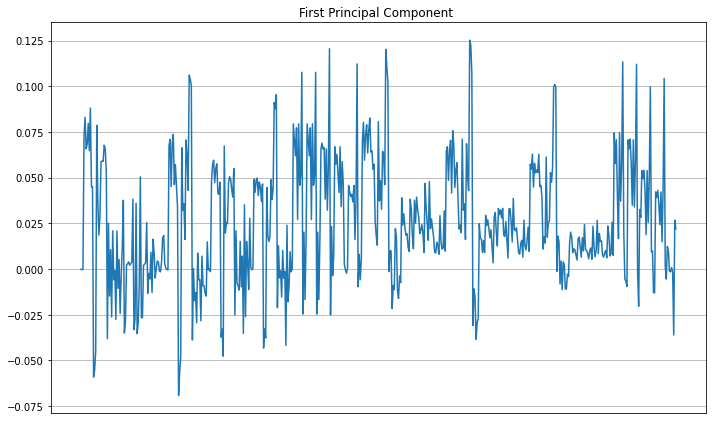

In [31]:
pca = PCA(n_components=6).fit(train_X)
pc1 = pd.Series(index=train_X.columns, data=pca.components_[0])
pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component ')
plt.tight_layout()
print(f'explained_variance_ratio_ {pca.explained_variance_ratio_}')


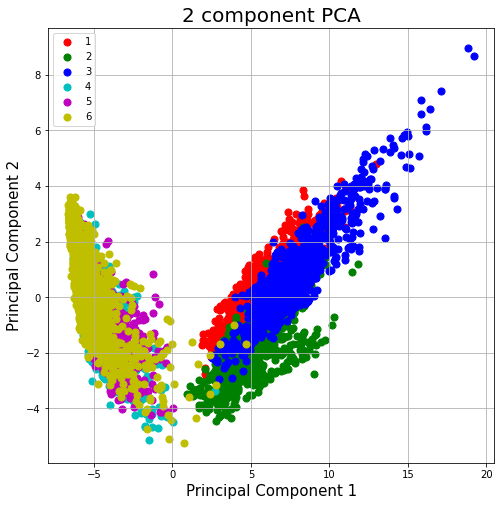

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 6]
colors = ['r', 'g', 'b','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['activity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Model

### SVC

In [16]:
principalDf

,principal component 1,principal component 2
0,-2.754984,-1.387994
1,-4.399115,-1.256752
2,-5.066335,-0.616208
3,-5.186594,-0.900993
4,-5.080981,-1.593048
...,...,...
2942,4.362105,-1.052656
2943,4.931064,-0.668948
2944,4.471733,-0.680634
2945,3.678032,-1.042152


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


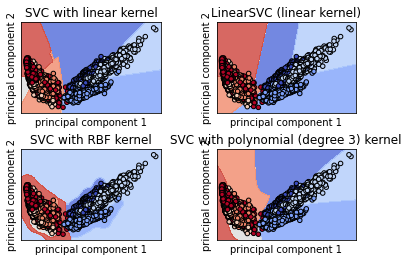

In [51]:
from sklearn import svm

def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(principalDf, train_Y.values.ravel()) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = principalDf.iloc[:, 0], principalDf.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=train_Y.to_numpy(), cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("principal component 1")
    ax.set_ylabel("principal component 2")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [39]:
from sklearn import svm
from sklearn import metrics

best_c = 1
best_val_score = 0
best_train_score = 0
best_k = ''

for k in ['linear','poly','rbf','sigmoid']:
  for c in np.arange(0.05,3.05,0.05):
    clf=svm.SVC(C=c,gamma="auto",kernel=k)
    clf.fit(train_X, train_Y.values.ravel())
    tempTrain = clf.score(train_X, train_Y.values.ravel())
    temp = clf.score(val_X, val_Y.values.ravel() )
    print(f'for kernel={k}, C={c}, train score={tempTrain}, val_score={temp}')
    if temp > best_val_score :
      best_val_score=temp
      best_train_score = tempTrain
      best_c=c
      best_k=k
print(f'best result noted for kernel={best_k}, C={best_c}, train score={best_train_score}, val_score={best_val_score}')

for kernel=linear, C=0.05, train score=0.9869423286180631, val_score=0.9524733268671193
for kernel=linear, C=0.1, train score=0.9899347116430903, val_score=0.9529582929194956
for kernel=linear, C=0.15000000000000002, train score=0.9908868335146899, val_score=0.9515033947623667
for kernel=linear, C=0.2, train score=0.9915669205658324, val_score=0.953443258971872
for kernel=linear, C=0.25, train score=0.9921109902067464, val_score=0.953443258971872
for kernel=linear, C=0.3, train score=0.9922470076169749, val_score=0.953443258971872
for kernel=linear, C=0.35000000000000003, train score=0.9927910772578891, val_score=0.9529582929194956
for kernel=linear, C=0.4, train score=0.9927910772578891, val_score=0.9539282250242483
for kernel=linear, C=0.45, train score=0.9929270946681176, val_score=0.953443258971872
for kernel=linear, C=0.5, train score=0.9936071817192601, val_score=0.9529582929194956
for kernel=linear, C=0.55, train score=0.9934711643090316, val_score=0.9524733268671193
for kernel=

In [47]:
#best result noted for kernel=linear, C=1.8, train score=0.9945593035908596, val_score=0.9558680892337537
best_k='linear'
best_c=1.8
best_train_score=0.9945593035908596
best_val_score=0.9558680892337537
print(best_k, best_c, best_train_score, best_val_score)

linear 1.8 0.9945593035908596 0.9558680892337537


#### Result

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = svm.SVC(C=best_c,gamma="auto",kernel=best_k)
clf.fit(train_X,train_Y.values.ravel())
pred_Y = clf.predict(test_X)
print(clf.score(test_X, test_Y.values.ravel() ))
print(confusion_matrix(test_Y, pred_Y))





0.9640312181879878
[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


### GPC
Written by TOMO

I implemented it by Hyper Performance Computing with 10 CPUs. It took about 5 hours.

In [ ]:
%%script false
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, WhiteKernel

train_X_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/train/X_train.txt'
train_Y_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/train/y_train.txt'

test_X_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/test/X_test.txt'
test_Y_path = 'https://raw.githubusercontent.com/JayPBhatia/SUTDML2021Project/main/UCI_HAR_Dataset/test/y_test.txt'


train_X = pd.read_csv(train_X_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')
train_Y = pd.read_csv(train_Y_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')

test_X = pd.read_csv(test_X_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')
test_Y = pd.read_csv(test_Y_path, delim_whitespace=True, header=None, error_bad_lines=False, engine='python')

n = len(test_Y)
val_Y = test_Y[:int(n*0.7)]
test_Y = test_Y[int(n*0.7):]
val_X = test_X[:int(n*0.7)]
test_X = test_X[int(n*0.7):]

best_val_score = 0
best_train_score = 0
best_k = ''


for k in [1*RBF(), 1*DotProduct(), 1*Matern(), 1*RationalQuadratic(), 1*WhiteKernel()]:
    clf=GaussianProcessClassifier(kernel=k, n_jobs=-1)
    clf.fit(train_X, train_Y.values.ravel())
    tempTrain = clf.score(train_X, train_Y.values.ravel())
    temp = clf.score(val_X, val_Y.values.ravel() )
    print(f'for kernel={k}, train score={tempTrain}, val_score={temp}')
    if temp > best_val_score :
      best_val_score=temp
      best_train_score = tempTrain
      best_k=k
print(f'best result noted for kernel={best_k}, train score={best_train_score}, val_score={best_val_score}')




for kernel=1**2 * RBF(length_scale=1), train score=1.0, val_score=0.9582929194956353

for kernel=1**2 * DotProduct(sigma_0=1), train score=0.9955114254624592, val_score=0.950533462657614

for kernel=1**2 * Matern(length_scale=1, nu=1.5), train score=1.0, val_score=0.9558680892337537

for kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), train score=1.0, val_score=0.9587778855480117

for kernel=1**2 * WhiteKernel(noise_level=1), train score=0.1913764961915125, val_score=0.17652764306498545

best result noted for kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), train score=1.0, val_score=0.9587778855480117

#### Result

In [ ]:
%%script false
kernel = 1*RationalQuadratic()

clf=GaussianProcessClassifier(kernel=kernel, n_jobs=-1)
clf.fit(train_X, train_Y.values.ravel())
pred_Y = clf.predict(test_X)
print(clf.score(test_X, test_Y.values.ravel() ))
print(confusion_matrix(test_Y, pred_Y))

98.76%


|   pred\label  |  WALKING   |  WALKING_UPSTAIRS   |   WALKING_DOWNSTAIRS  |   SITTING  |  STANDING   |   LAYING  | 
| --- | --- | --- | --- | --- | --- | --- | 
|   WALKING  |   135  |  1   |  0   |  0   |  0   |  0   | 
|   WALKING_UPSTAIRS  |   0  |  139   |   0  |   0  |   0  |  0   | 
|   WALKING_DOWNSTAIRS  |  0   |  7   |  120   |  0   |  0   |  0   | 
|   SITTING  |   0  |   0  |  0   |  159   |  2   |   0  | 
|   STANDING  |   0  |  0   |  0   |  1   |  148   |  0   | 
|   LAYING  |   0  |  0   |  0   |   0  |   0  |   173  | 

### DecisionTreeClassifier

#### Result

### KNeighborsClassifier

#### Result